![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram 
from scipy.cluster.vq import whiten


In [3]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [17]:
# columns 
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [4]:
# Description of the dataset 
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# Get dummy variables 
penguins_df = pd.get_dummies(penguins_df, dtype='int')
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    int32  
 5   sex_MALE           332 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 13.1 KB
None


In [8]:
# Exploring for variance 
print(penguins_df.var())

culmen_length_mm         29.729343
culmen_depth_mm           3.842680
flipper_length_mm       197.008481
body_mass_g          650218.509992
sex_FEMALE                0.250746
sex_MALE                  0.250746
dtype: float64


In [13]:
# Normalize the data with whiten method 

whitened_data = whiten(penguins_df.values)
whitened_data

array([[ 7.18189662,  9.55387505, 12.91490329,  4.65754059,  0.        ,
         2.00003629],
       [ 7.25536871,  8.88970192, 13.27166858,  4.71964113,  2.00003629,
         0.        ],
       [ 7.40231288,  9.19624337, 13.91384609,  4.03653518,  2.00003629,
         0.        ],
       ...,
       [ 9.25748311,  8.02116783, 15.84037863,  7.14156224,  0.        ,
         2.00003629],
       [ 8.30234596,  7.56135566, 15.12684806,  6.45845628,  2.00003629,
         0.        ],
       [ 9.165643  ,  8.22552879, 15.19820111,  6.70685845,  0.        ,
         2.00003629]])

In [15]:
# Convert normalized data to a DataFrame

penguins_norm = pd.DataFrame(whitened_data, columns=penguins_df.columns)
penguins_norm.describe()    

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,8.085802,8.763515,14.340245,5.224489,0.993994,1.006042
std,1.001509,1.001509,1.001509,1.001509,1.001509,1.001509
min,5.896135,6.692822,12.272726,3.353429,0.000000,0.000000
25%,7.255369,7.970078,13.557081,4.409138,0.000000,0.000000
50%,8.210506,8.838612,14.056552,4.999094,0.000000,2.000036
75%,8.931451,9.553875,15.198201,5.938364,2.000036,2.000036
max,10.947341,10.984402,16.482556,7.824668,2.000036,2.000036


In [20]:
# Create distance matrix 
distance_matrix = linkage(penguins_norm, method='ward', metric = 'euclidean')

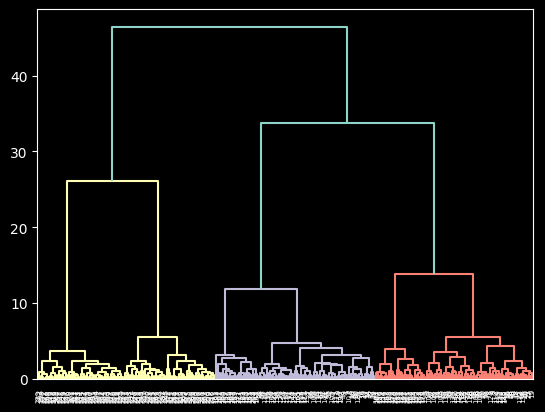

In [21]:
# Visualizing clusters with dendrogram
dn = dendrogram(distance_matrix)
plt.show()

In [22]:
# Assign cluster labels
penguins_norm['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')
print(penguins_norm['cluster_labels'].value_counts())

cluster_labels
3    107
4    106
2     61
1     58
Name: count, dtype: int64


C:\Users\davic\AppData\Local\Temp\ipykernel_28756\2037982904.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(penguins_norm['cluster_labels'], penguins_norm['culmen_length_mm'], cmap='viridis')


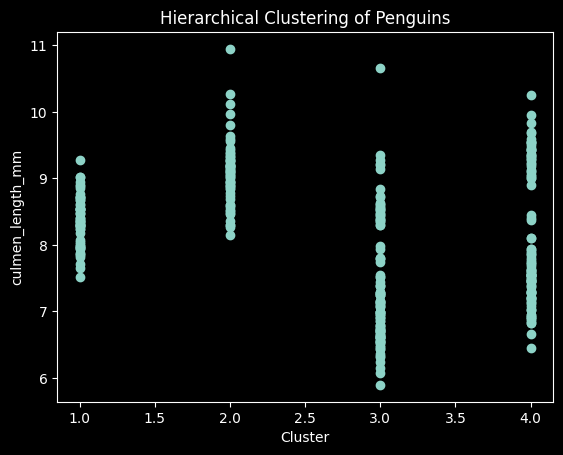

In [26]:
# Visualize Clusters 
plt.scatter(penguins_norm['cluster_labels'], penguins_norm['culmen_length_mm'], cmap='viridis') 
plt.xlabel('Cluster') 
plt.ylabel('culmen_length_mm') 
plt.title(f'Hierarchical Clustering of Penguins') 
plt.show()